In [231]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2

In [232]:
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights

weights = FasterRCNN_ResNet50_FPN_Weights

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=weights)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [233]:
ig = Image.open("Image9.jpg")

transform = T.ToTensor()
img = transform(ig)

In [234]:
with torch.no_grad():
    pred = model([img])

In [238]:
import random

bboxes, labels, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]

num = torch.argwhere(scores > 0.9).shape[0]

coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , "frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , "baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , "plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,  "banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" , "pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" , "mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" , "laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" , "oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]
name_colors = []

for i in coco_names:
    while True:
        color = tuple(random.choices(range(256), k=3))
        if color not in name_colors and sum(color) >= 200 and sum(color) <= 600:
            name_colors.append(color)
            break

# print(name_colors)

igg = cv2.imread("image9.jpg")

font = cv2.FONT_HERSHEY_SIMPLEX

for i in range(num):
    # print(scores[i])
    x1, y1, x2, y2 = bboxes[i].numpy().astype(int)
    # print(labels.numpy().tolist())
    class_name = coco_names[labels.numpy()[i]-1]
    igg = cv2.rectangle(igg, (x1, y1), (x2, y2), name_colors[labels.numpy()[i]-1], 4)
    igg = cv2.putText(igg, class_name, (x1, y1-10), font, 1.7, name_colors[labels.numpy()[i]-1], 4, cv2.LINE_AA)

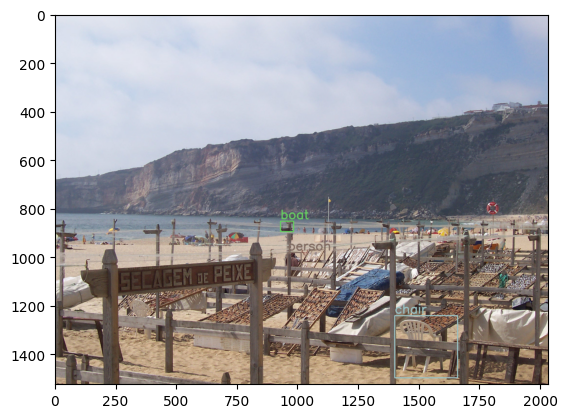

In [239]:
import matplotlib.pyplot as plt


plt.imshow(cv2.cvtColor(igg, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()